In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from ipywidgets import Dropdown

def plot_data_3d(file):
    file_path = os.path.join("..\eyetracking\Assets\Scripts\Data", file)
    df = pd.read_csv(file_path, delimiter=';', usecols=['Timestamp', 'Region', 'Target', 'PosX', 'PosY', 'PosZ'])
    df = df[~((df['PosX'] == 0) & (df['PosY'] == 0) & (df['PosZ'] == 10))]
    regions = df['Region'].unique()
    for region in regions:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        region_df = df[df['Region'] == region]
        colors = ['black' if pd.isna(target) else 'red' for target in region_df['Target']]
        ax.scatter(region_df['PosX'], region_df['PosY'], region_df['PosZ'], c=colors)
        plt.title(f'Region {region}')
        plt.show()

In [2]:
def plot_data_2d(file):
    file_path = os.path.join("..\eyetracking\Assets\Scripts\Data", file)
    df = pd.read_csv(file_path, delimiter=';', usecols=['Timestamp', 'Region', 'Target', 'PosX', 'PosY', 'PosZ'])
    df = df[~((df['PosX'] == 0) & (df['PosY'] == 0) & (df['PosZ'] == 10))]
    regions = df['Region'].unique()
    for region in regions:
        fig = plt.figure()
        ax = fig.add_subplot(111)
        region_df = df[df['Region'] == region]
        colors = ['black' if pd.isna(target) else 'red' for target in region_df['Target']]
        ax.scatter(region_df['PosX'], region_df['PosY'], c=colors)
        plt.title(f'Region {region}')
        plt.show()

In [3]:
def plot_data_2d_v2(file):
    file_path = os.path.join("..\eyetracking\Assets\Scripts\Data", file)
    df = pd.read_csv(file_path, delimiter=';', usecols=['Timestamp', 'Region', 'Target', 'PosX', 'PosY', 'PosZ'])
    df = df[~((df['PosX'] == 0) & (df['PosY'] == 0) & (df['PosZ'] == 10))]
    regions = df['Region'].unique()
    for region in regions:
        fig = plt.figure(figsize=(40, 40))
        ax = fig.add_subplot(111)
        region_df = df[df['Region'] == region]
        colors = ['black' if pd.isna(target) else 'red' for target in region_df['Target']]
        ax.scatter(region_df['PosX'], region_df['PosY'], c=colors)
        plt.title(f'Region {region}')
        plt.show()

In [4]:
# Select CSV file
folder_path = 'data'
files = [filename for filename in os.listdir("..\eyetracking\Assets\Scripts\Data") if filename.endswith('.csv')]

dropdown = Dropdown(options=files)
display(dropdown)

Dropdown(options=('GazeData1.csv',), value='GazeData1.csv')

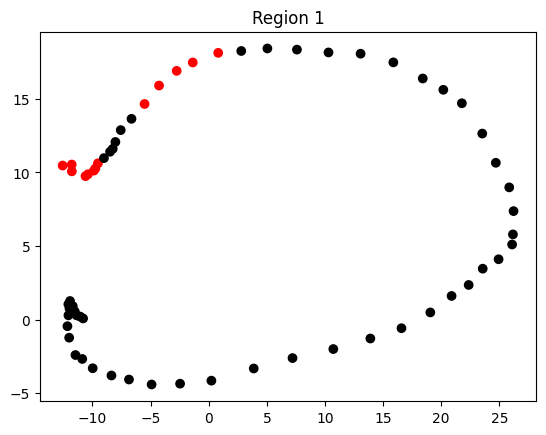

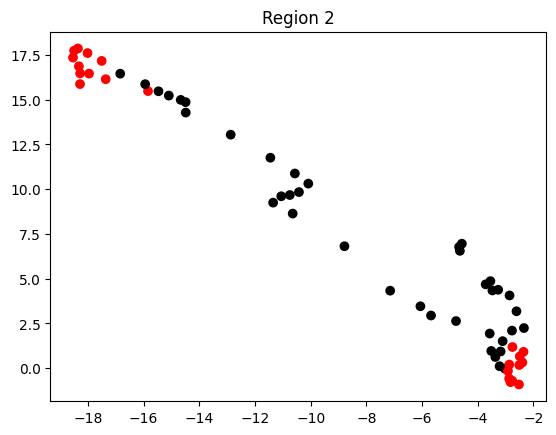

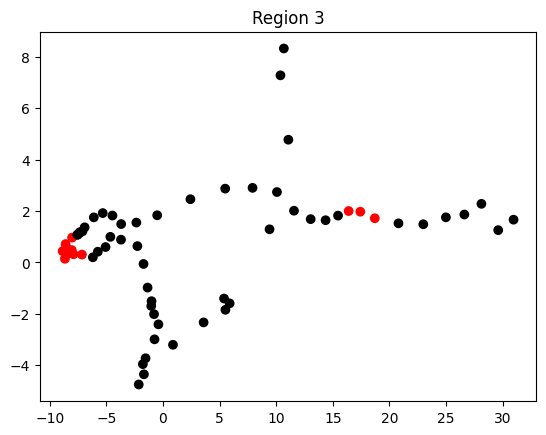

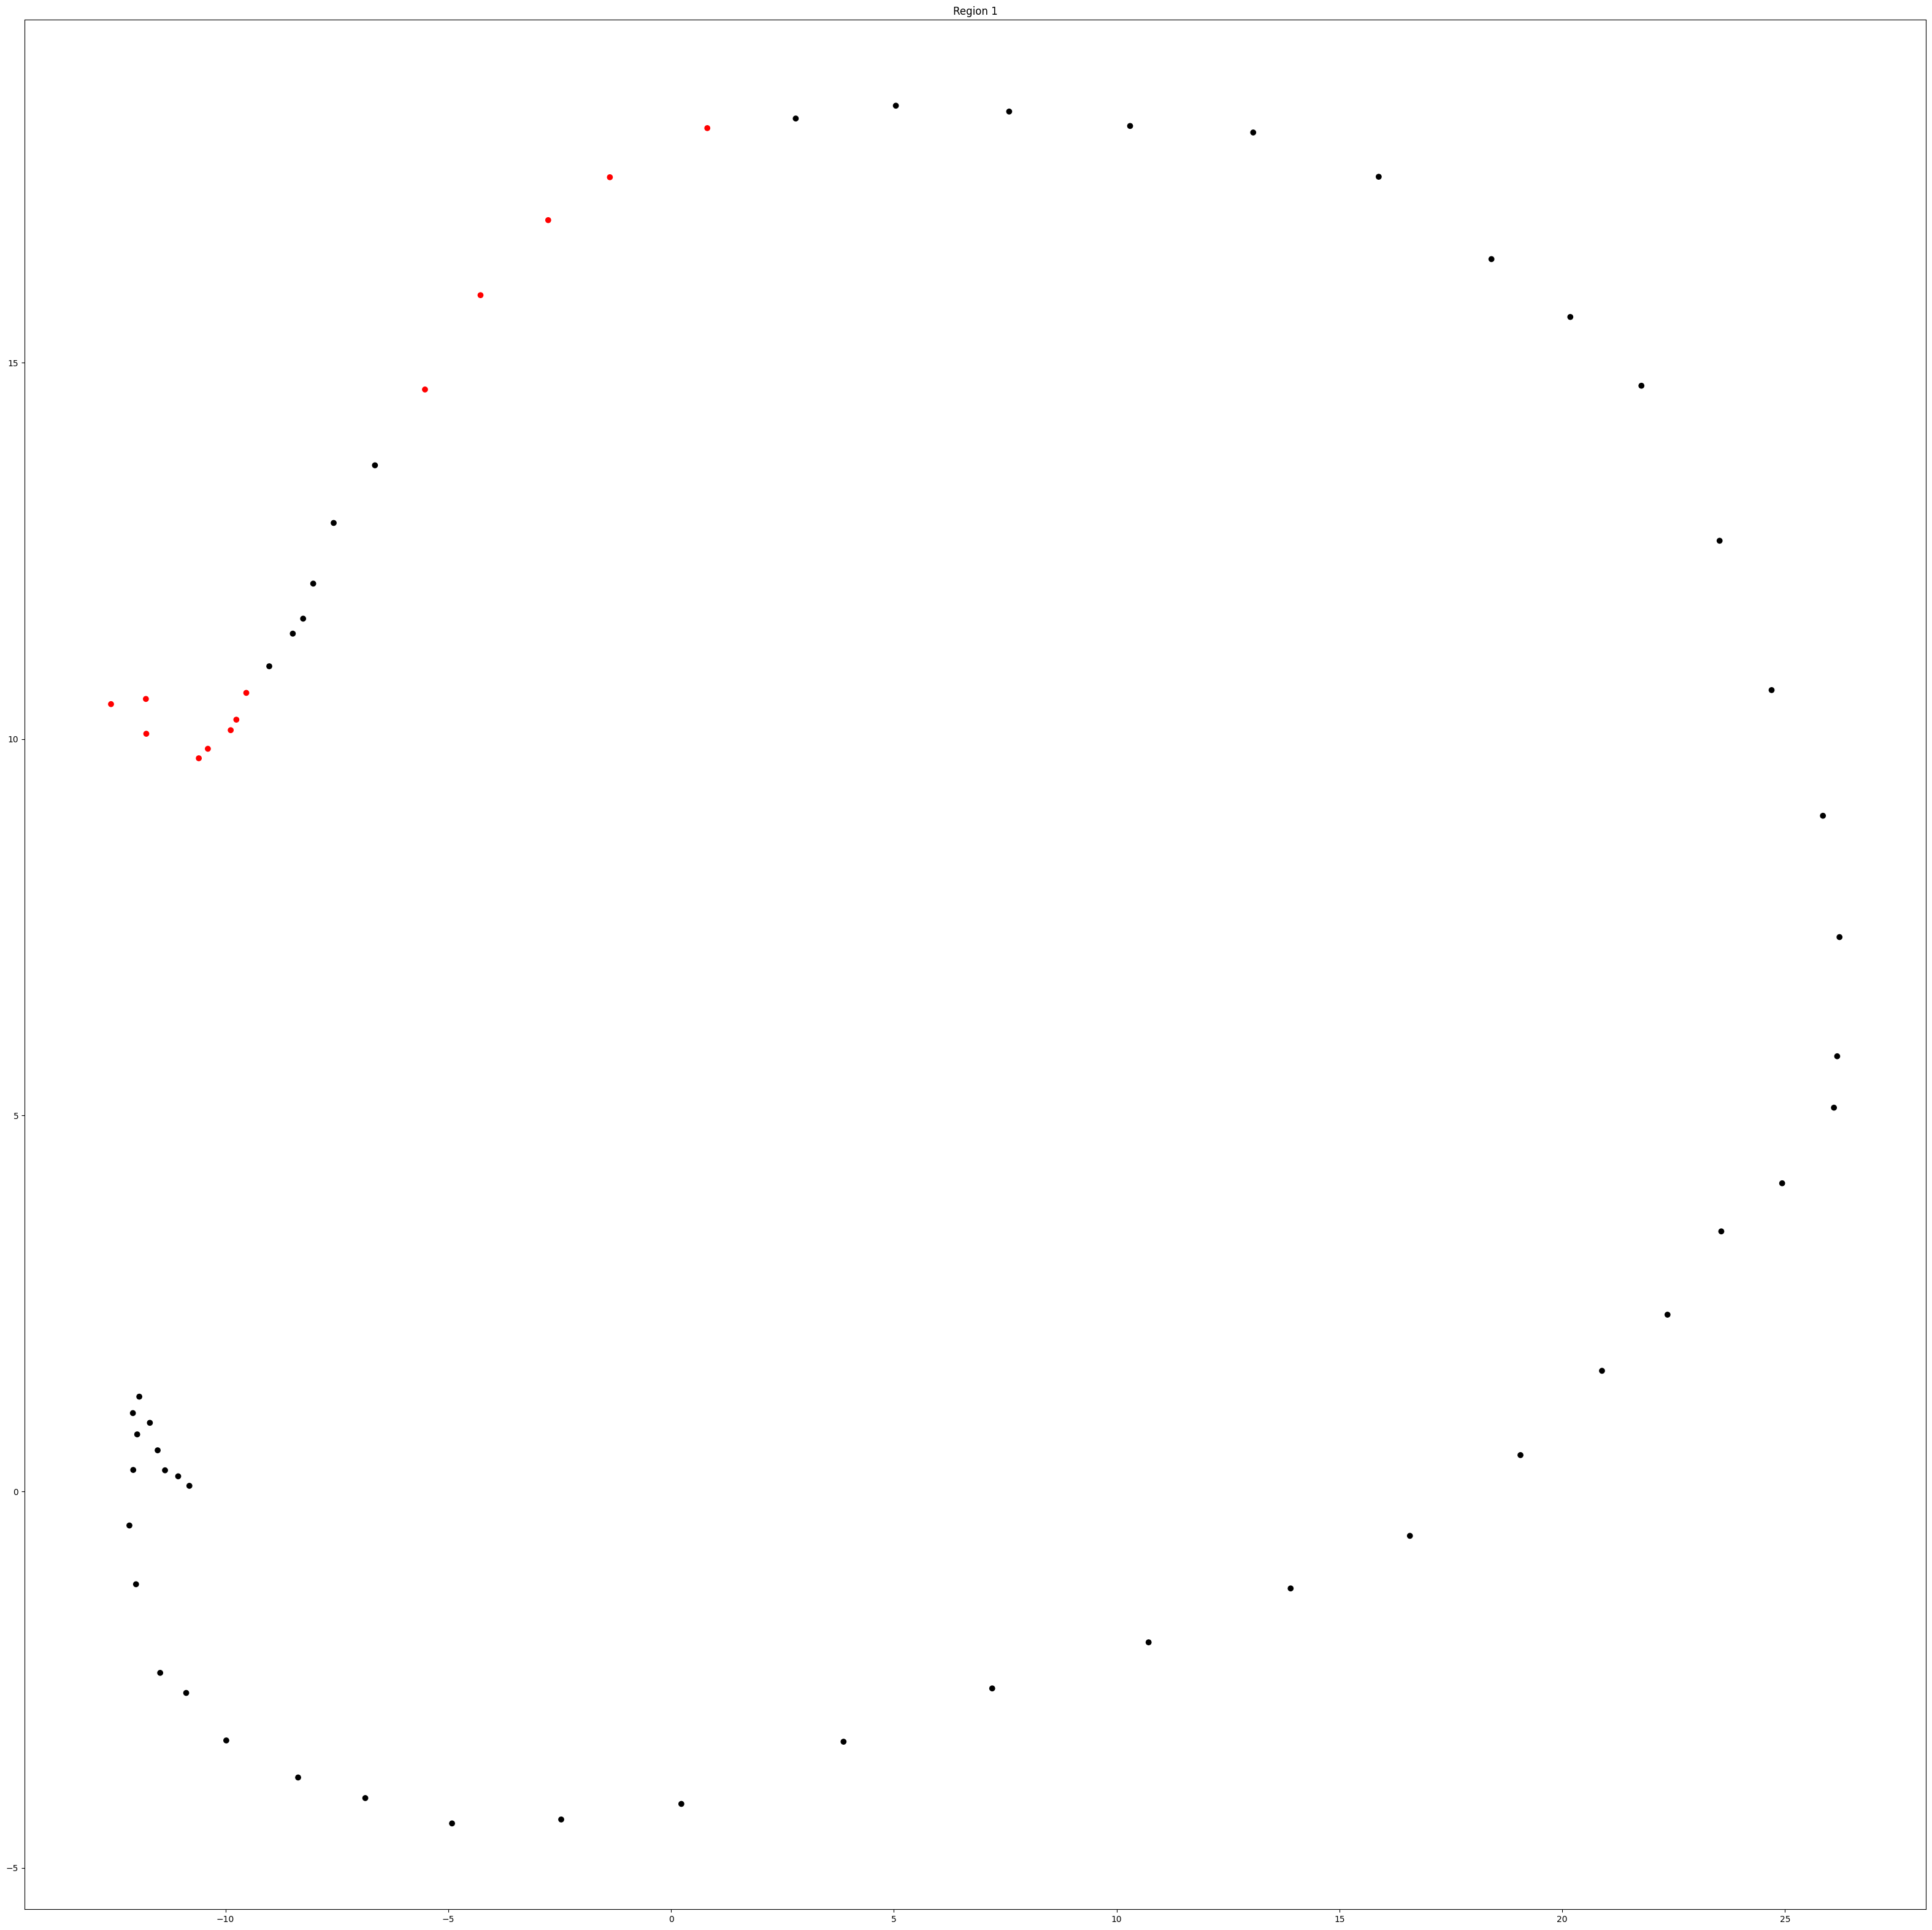

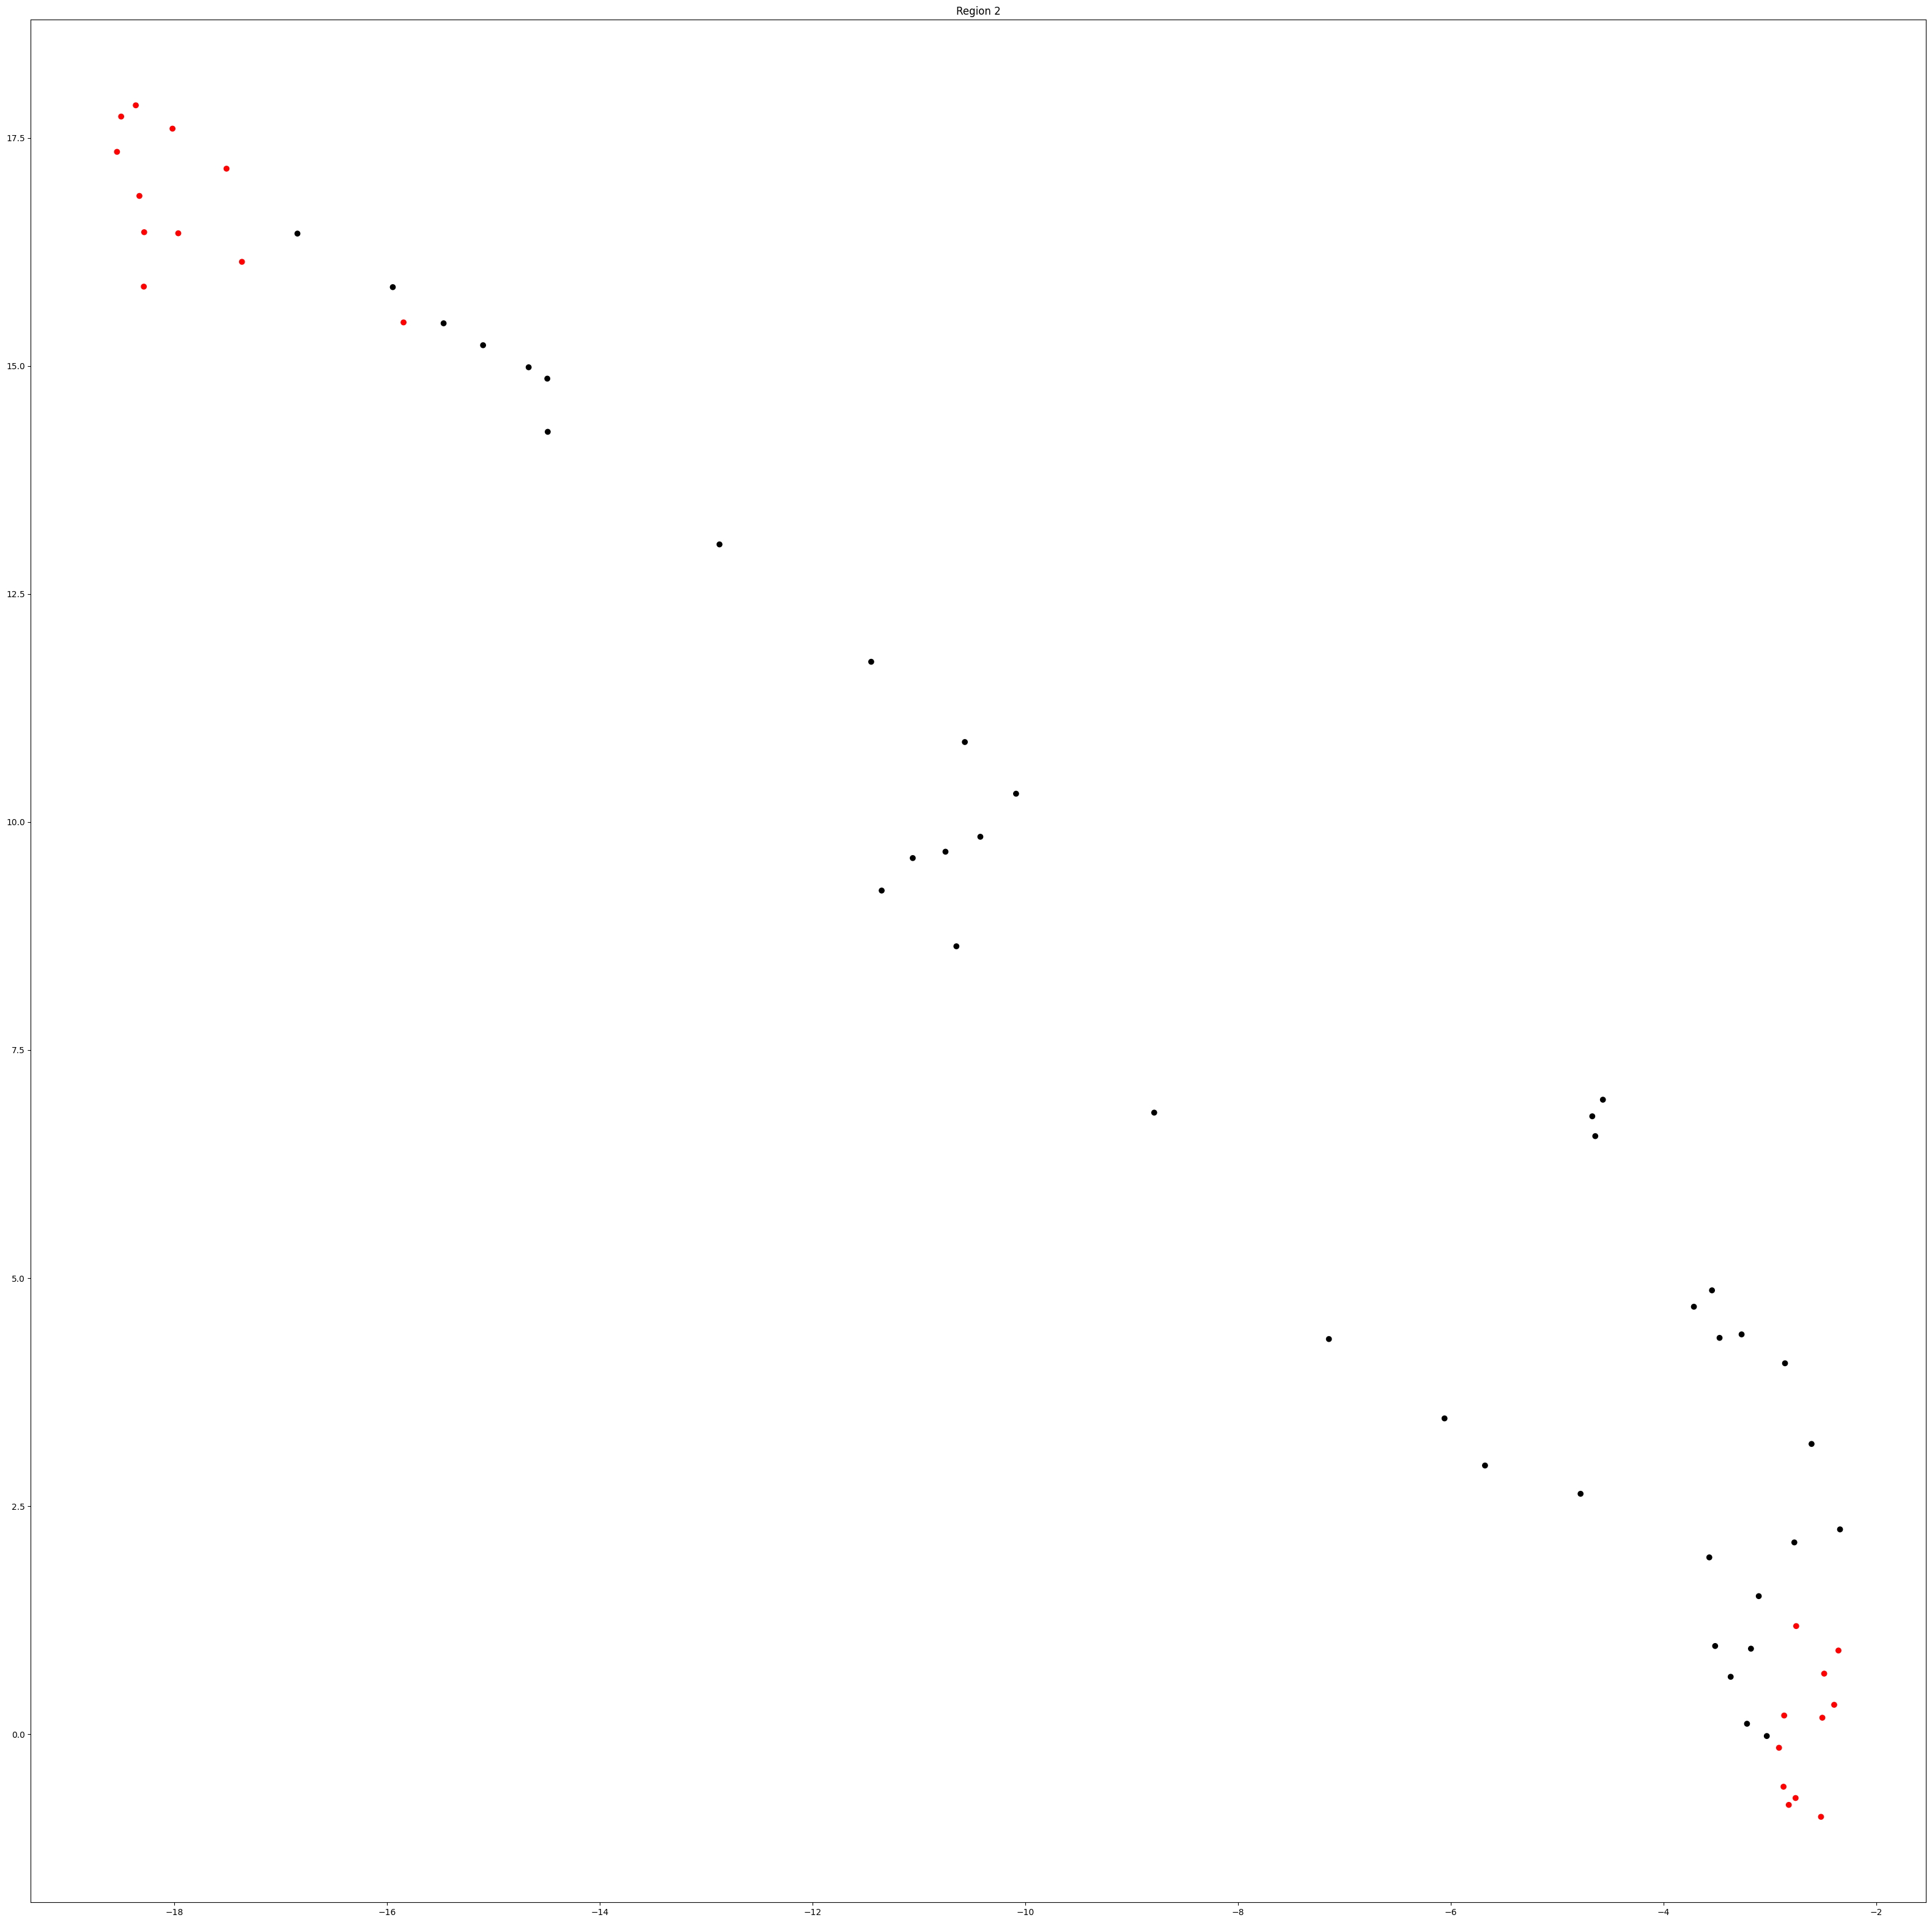

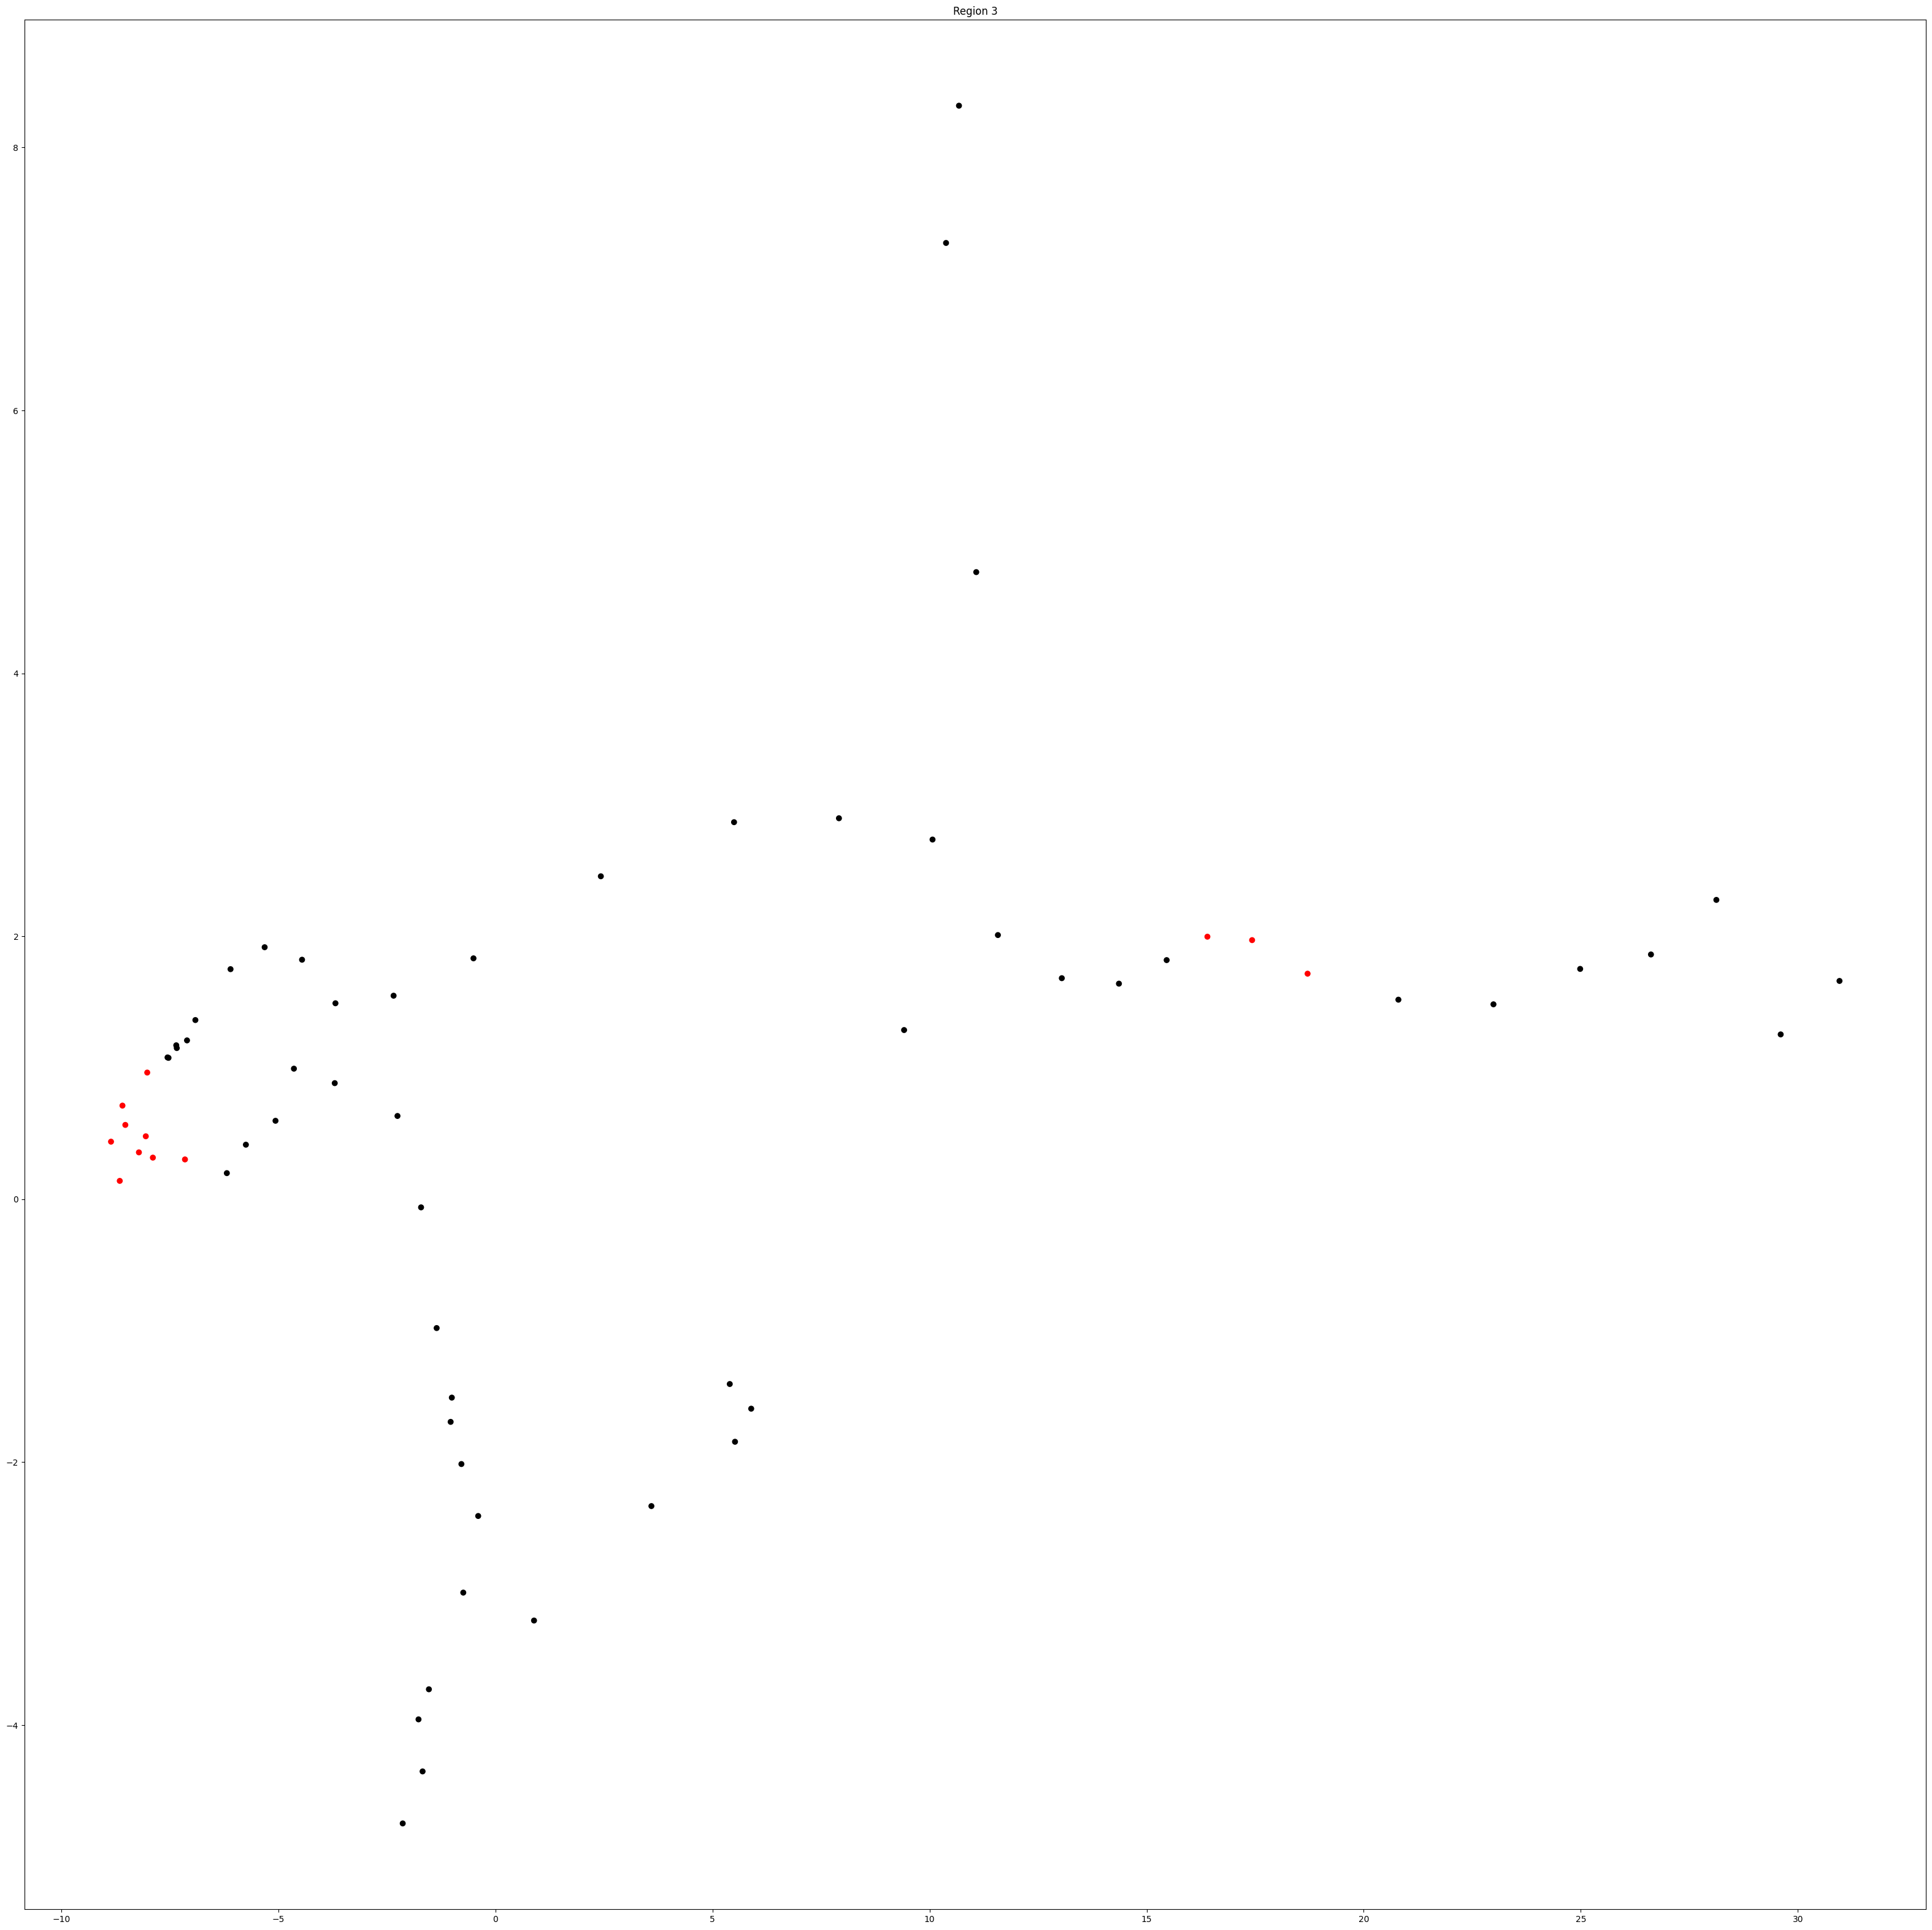

In [5]:
# Run this cell after selecting a file from the dropdown menu
plot_data_2d(dropdown.value)
#plot_data_3d(dropdown.value)
plot_data_2d_v2(dropdown.value)

In [34]:
def heatmap_data(file, image_file):
    file_path = os.path.join("..\eyetracking\Assets\Scripts\Data", file)
    df = pd.read_csv(file_path, delimiter=';', usecols=['Timestamp', 'Region', 'Target', 'PosX', 'PosY', 'PosZ'])
    df = df[~((df['PosX'] == 0) & (df['PosY'] == 0) & (df['PosZ'] == 10))]
    img = plt.imread(image_file)
    regions = df['Region'].unique()
    for region in regions:
        fig = plt.figure(figsize=(19.2, 10.8))
        ax = fig.add_subplot(111)
        ax.imshow(img)
        ax.set_facecolor('none')
        fig.patch.set_alpha(1.0)
        region_df = df[df['Region'] == region]
        heatmap_data = region_df[['PosX', 'PosY']].copy()
        
        # Scale the data in the PosX and PosY columns to match the resolution of the background image
        heatmap_data.loc[:, 'PosX'] = heatmap_data['PosX'] / heatmap_data['PosX'].max() * img.shape[1]
        heatmap_data.loc[:, 'PosY'] = heatmap_data['PosY'] / heatmap_data['PosY'].max() * img.shape[0]
        
        sns.kdeplot(data=heatmap_data, x='PosX', y='PosY', fill=True)
        plt.title(f'Region {region}')
        plt.show()

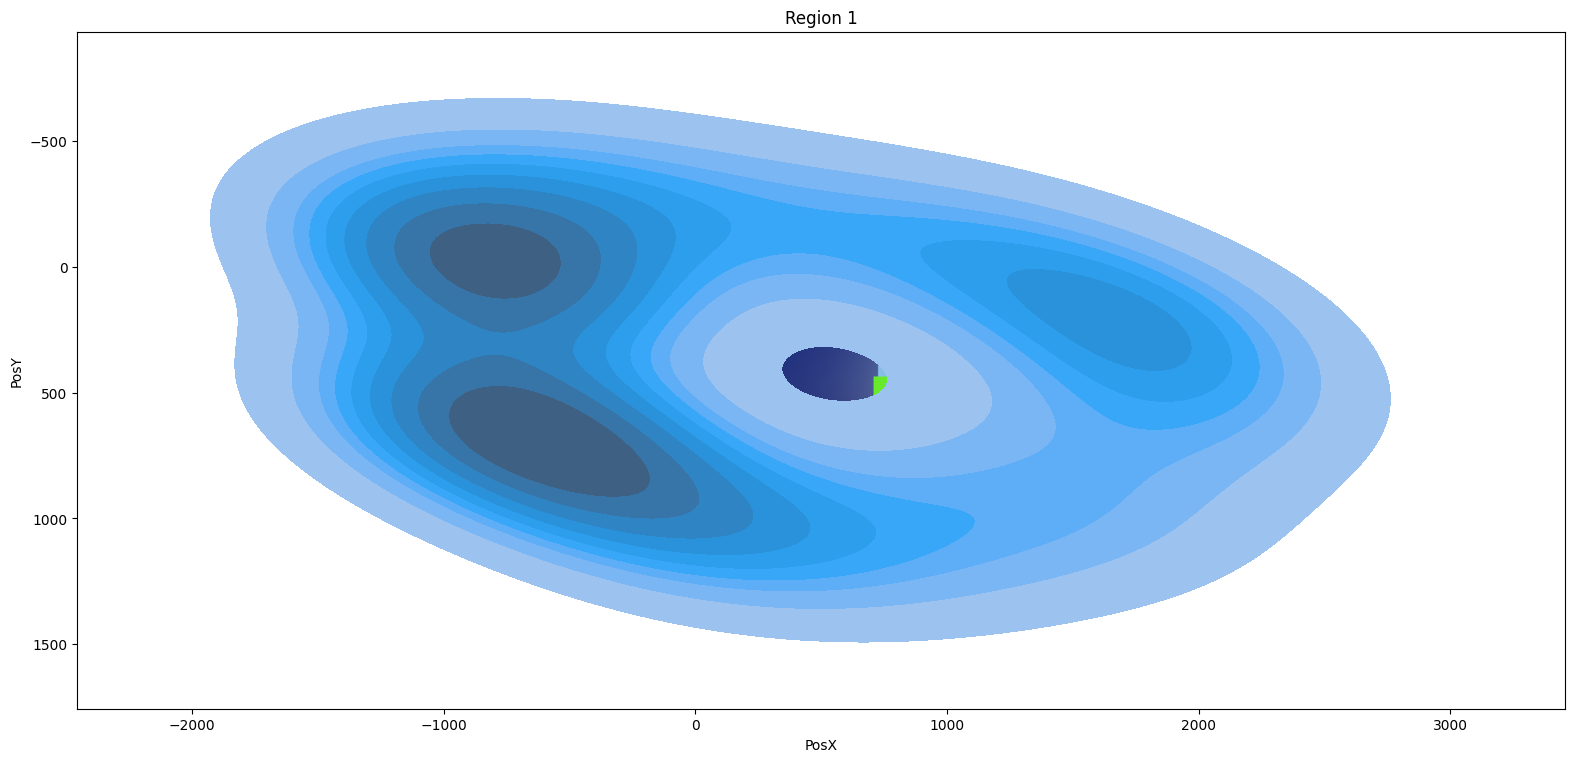

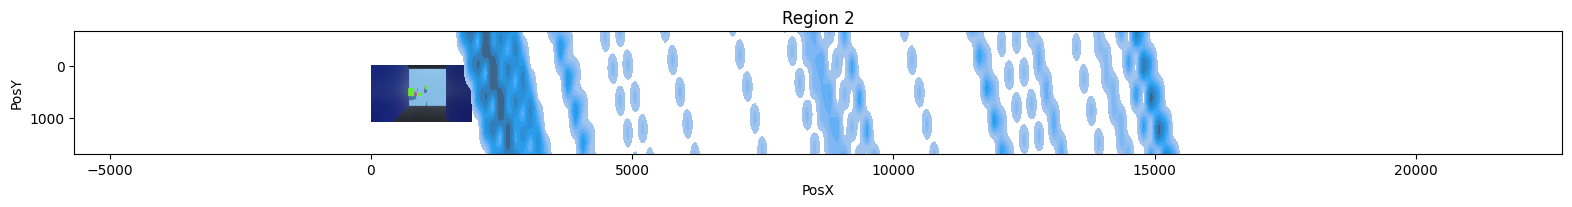

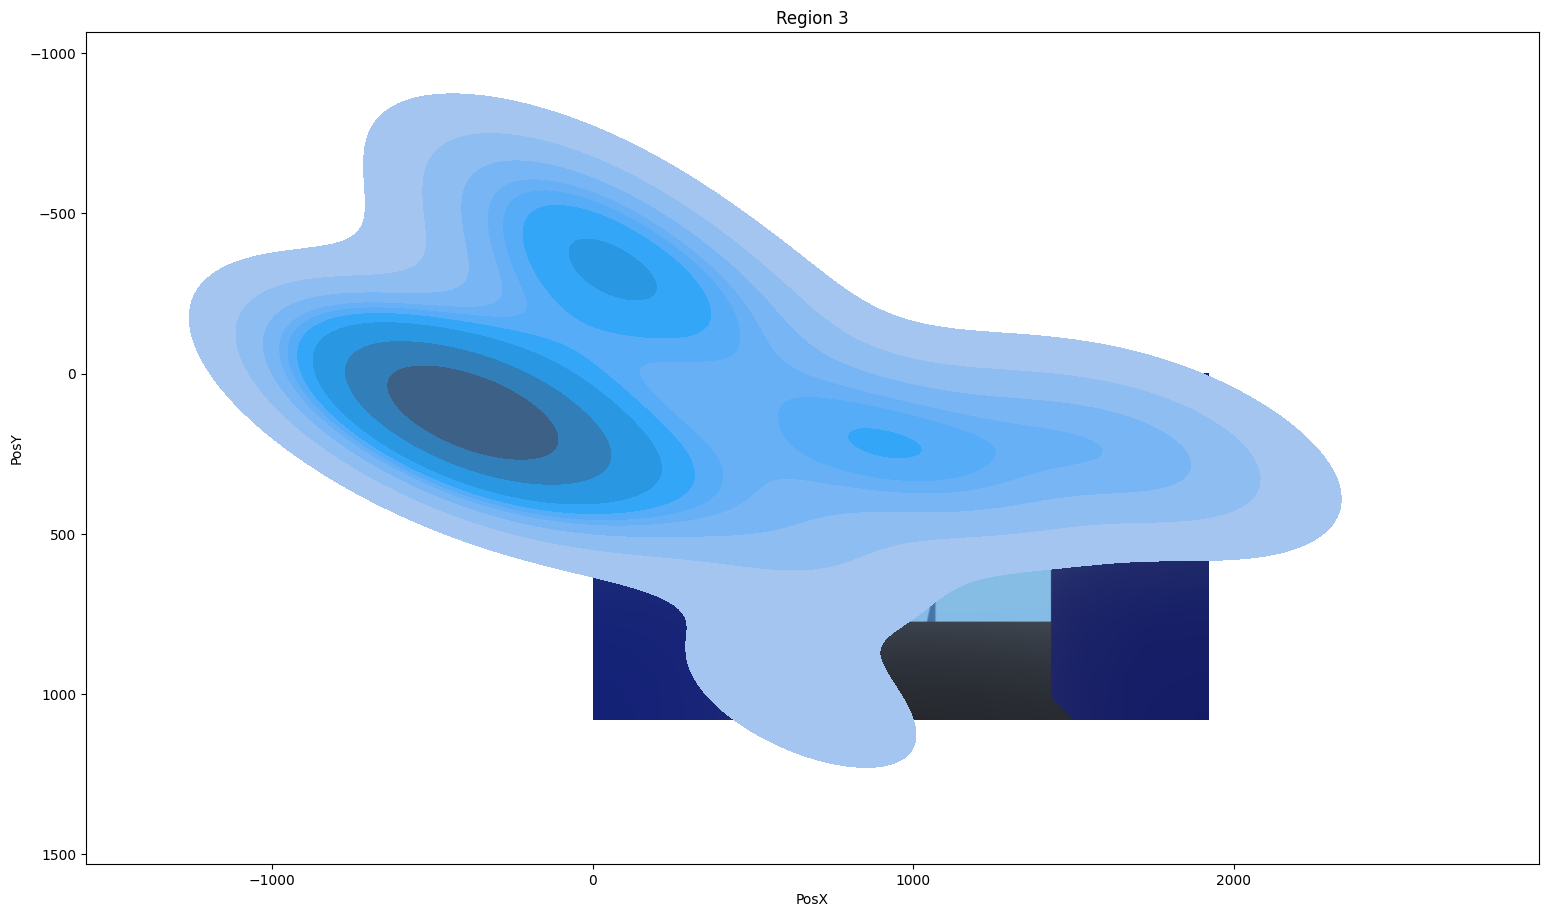

In [35]:
heatmap_data(dropdown.value, '..\eyetracking\Assets\Scripts\Data\Screenshots\Screenshot_GazeData(1)_Region(0).png')